In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Student: Cano Jeorval

# A4.1 Multilayer Percetron

The main goal of **A4.1 Multilayer Perceptron** is to implement this model by using a Object-Oriented approach. 

<center><img src=https://blog.aimultiple.com/wp-content/uploads/2017/08/neural-network.png></center>

In [2]:
class NeuralNetwork:
    '''
    Multilayer Perceptron with one hiddhen layer
    '''
    
    def __init__(self, n_input, n_hidden, n_output=1, learning_rate=0.01):
        '''
        Function to initialize the Multilayer Perceptron
        '''
        
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        
        self.learning_rate = learning_rate
        
        self.w1 = np.random.rand(self.n_input + 1, self.n_hidden)
        self.w2 = np.random.rand(self.n_hidden + 1, self.n_output)
        
        
    def _format_x(self, X):
        """
        Private function to add a new column of values 1 to the matrix of the variables, the column is add in the end of the matrix
        
        Input:
        * X: Matrix or array containing the values of the input variable
        
        Output:
        * Return either a vector having added 1 to its first value or a Matrix having a new column of 1
        """
        X = np.array(X)
        #creating columns of
        new_column = [1 for i in range(len(X))] 
        
        #case of matrix
        try:
            return np.insert(X, len(X[0]), new_column, axis = 1)
        
        #case of a vector, so each value of the vector become a row
        except:
            
            X = np.reshape(X, (len(X)/self.n_input,self.n_input))
            
            return np.insert(X, len(X[0]), new_column, axis = 1)
        
        
        
    def sigmoid(self, x):
        """
        Function to compute the sigmoid function given x
        """

        sigmoid = 1/(1+np.exp(-x))

        return sigmoid

    def d_sigmoid(self, x):
        """
        Function to compute the derivate sigmoid function given x
        """

        return sigmoid(x) * (1 - sigmoid(x))
    
    
    def prediction(self, x_input):
        '''
        Function to make the prediction given the input data (x_input)
        '''
        
        x_input = self._format_x(x_input)
        
        z1 = np.dot(x_input, self.w1)

        a1 = self.sigmoid(z1)
        
        a1 = self._format_x(a1)

        z2 = np.dot(a1 , self.w2)

        a2 = self.sigmoid(z2)

        y_pred = a2
             
        return y_pred
    
    def loss(self, x_inputs, y_labels):
        '''
        Function to calculate the cost function.
        '''
        
        y_labels = np.array(y_labels)
        
        x_inputs = np.array(x_inputs)
        
        total_cost = -(1 / len(x_inputs)) * np.sum(y_labels * np.log(self.prediction(x_inputs)) + (1 - y_labels) * np.log(1 - self.prediction(x_inputs)))

        return total_cost
                                                   
    def backpropagation(self, x_train, y_train):
        '''
        Function to perform the backpropagation
        '''
        y_pred = self.prediction(x_train)
        
        y_train = np.array(y_train)
        
        #delta_w2 = \partial J / \partial w2
        delta_w2 = (y_pred - y_train)
        
        self.we -= self.learning_rate * delta_W2
        
    def fit(self, x_train):
        '''
        Function to perform the fit of the model to the train set.
        '''
        
        # Code here!

## Tasks

1. Create two weight matrices (`w1`and `w2`) with the appropriate shape and initialize them with random numbers.
2. Complete the functions of the sigmoide and its derivative. Plot both functions.
$$ \sigma = \frac{1}{1+e^{-x}} $$

In [3]:
def sigmoid(x):
    """
    Function to compute the sigmoid function given x
    """

    sigmoid = 1/(1+np.exp(-x))

    return sigmoid

def d_sigmoid(x):
    """
    Function to compute the derivate sigmoid function given x
    """

    return sigmoid(x) * (1 - sigmoid(x))

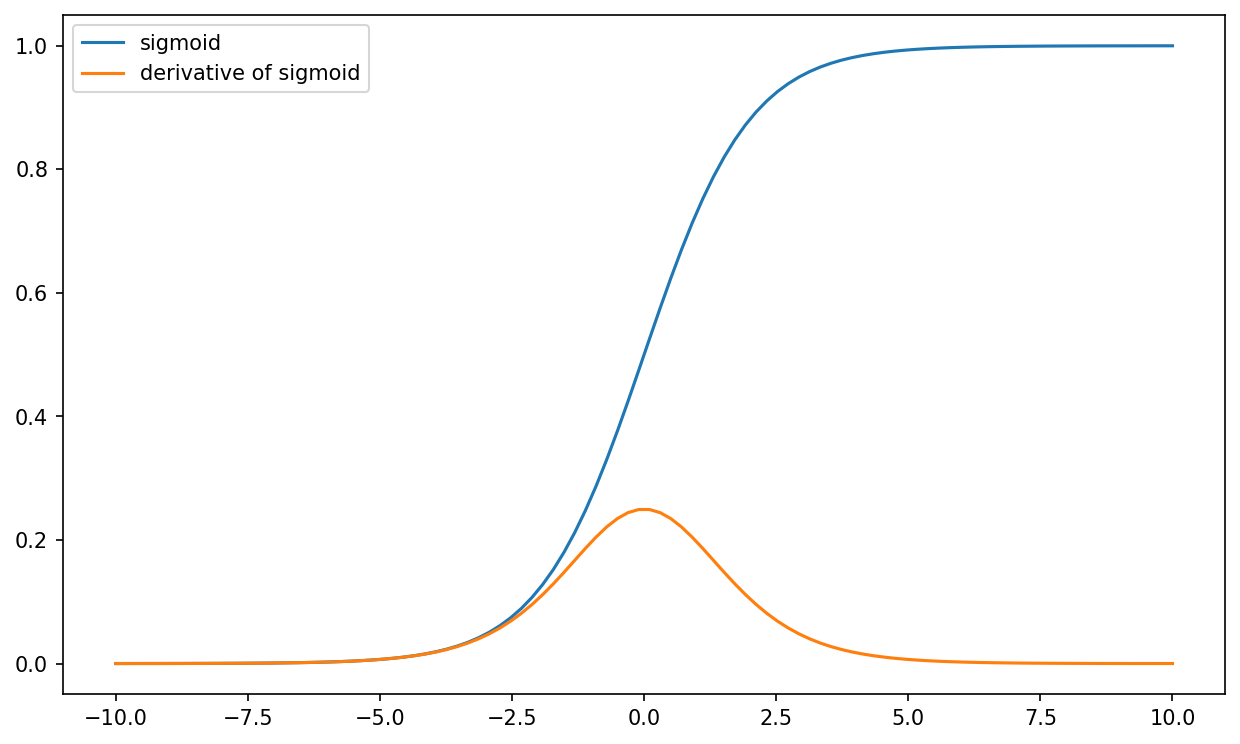

In [4]:
x_line = np.linspace(-10,10,100)

y_line_sig = sigmoid(x_line)

y_line_d_sig = d_sigmoid(x_line)

plt.figure(figsize = [10,6], dpi = 150)

plt.plot(x_line, y_line_sig, label = 'sigmoid')
plt.plot(x_line, y_line_d_sig, label = 'derivative of sigmoid')
plt.legend()

plt.show()

2. Complete the prediction function (Feedforward) considering the sigmoid as the activation function. 

$$ x_{in} $$
$$ \downarrow $$
$$ z_1 = x_{in}\cdot w_1 + b_1$$
$$ \downarrow $$
$$ a_1 = \sigma(z_1) $$
$$ \downarrow $$
$$ z_2 = a_1\cdot w_2 + b_2$$
$$ \downarrow $$
$$ a_2 = \sigma(z_2) $$
$$ \downarrow $$
$$ y_p = a_2 $$

In [5]:
def _format_x(X):
    """
    Private function to add a new column of values 1 to the matrix of the variables, the column is add in the end of the matrix

    Input:
    * X: Matrix or array containing the values of the input variable

    Output:
    * Return either a vector having added 1 to its first value or a Matrix having a new column of 1
    """
    X = np.array(X)
    #creating columns of
    new_column = [1 for i in range(len(X))] 

    #case of matrix
    try:
        return np.insert(X, len(X[0]), new_column, axis = 1)

    #case of a vector, so each value of the vector become a row
    except:

        X = np.reshape(X, (len(X),1))

        return np.insert(X, 1, new_column, axis = 1)

In [6]:
y = [[1,2,3],[2,1,1]]
y

[[1, 2, 3], [2, 1, 1]]

In [7]:
_format_x(y)

array([[1, 2, 3, 1],
       [2, 1, 1, 1]])

In [8]:
perceptron = NeuralNetwork(2, 2, 1)

perceptron.prediction([[0,1]])

array([[0.65562225]])

3. Complete the function which computes the cost function. 
$$ \mathcal{J} =  -\sum{y_t\log{y_p} + (1-y_t)\log{1-y_p}}$$

In [9]:
test_inputs = [[0,0],[0,1],[1,0],[1,1]]
test_labels = [0,1,1,0]

In [10]:
perceptron.loss(test_inputs, test_labels)

2.974073904205504

4. Complete the Backpropagation phase when you the correction of the weights is performed.

### Chain Rule: $ \frac{\partial \mathcal{J}}{\partial w_2} $

$$ \frac{\partial \mathcal{J}}{\partial w_2} = \frac{\partial \mathcal{J}}{\partial y_p} * \frac{\partial y_p}{\partial z_2} * \frac{\partial z_2}{\partial w_2} $$

#### First term:

$$ \frac{\partial \mathcal{J}}{\partial y_p} = -\frac{y_t}{y_p} + \frac{1-y_t}{1-y_p} = \frac{y_p - y_t}{y_p\left(1-y_p\right)} $$

#### Second term:

$$ \frac{\partial y_p}{\partial z_2} = y_p (1-y_p) $$

#### Third term:

$$ \frac{\partial z_2}{\partial w_2} = a_1 $$

$$ \Downarrow $$

$$ \frac{\partial \mathcal{J}}{\partial w_2} = (y_p - y_t) a_1$$

### Chain Rule $ \frac{\partial \mathcal{J}}{\partial w_1} $

$$ \frac{\partial \mathcal{J}}{\partial w_1} = \frac{\partial \mathcal{J}}{\partial z_2} * \frac{\partial z_2}{\partial a_1} * \frac{\partial a_1}{\partial z_1} * \frac{\partial z_1}{\partial w_1} $$

#### First term:

$$ \frac{\partial \mathcal{J}}{\partial w_2} = \frac{\partial \mathcal{J}}{\partial y_p} * \frac{\partial y_p}{\partial z_2} = y_p - y_t$$

#### Second term:

$$ \frac{\partial z_2}{\partial a_1} = w_2 $$

#### Third term:

$$ \frac{\partial a_1}{\partial z_1} = a_1(1-a_1) $$

#### Fourth term:

$$ \frac{\partial z_1}{\partial w_1} = x_{in} $$

$$ \Downarrow $$

$$ \frac{\partial \mathcal{J}}{\partial w_1} = (y_p - y_t) \cdot w_2 \cdot a_1 \cdot (1 - a_1) \cdot x_{in}$$

5. Complete the train function to fit the parameters of the Multilayer Perceptron. Train a Multilayer Perceptron to work as a XOR Gate. Make a plot of the Loss over the Epochs.